# Terminating a Relationship

##### Jaap Abbring, 18 March 2019

This notebook studies a stationary *stopping problem*. This is arguably the simplest example of an infinite horizon Markov decision problem. Suppose you are in a relationship. At time $t$, this relationship returns a flow of utility $u(X_t)$ to you. Here, $X_t$ is a driver of relational satisfaction, which follows a Markov process on a finite support ${\cal X}$ that mimics a normal random walk with drift $\mu$ and innovation variance $\sigma^2$ (in a firm-worker match, $X_t$ may be match productivity; in a marriage, it may be marital happiness). In each period $t$ the relationship is still alive, after observing $X_t$, you either decide to terminate the relationship and collect an outside utility of $0$, or choose to continue the relationship, collect $u(X_t)$ now and expected future utility discounted with factor $0\leq\rho<1$. What is your optimal decision rule and how does it depend on your love for the future, $\rho$, and the uncertainty you are facing, $\sigma$?

### A Discretized Random Walk with Drift

We first construct a Markov transition matrix `capPi` ($\Pi$) that mimics a normal random walk with drift `mu` ($\mu$) and standard deviation `sigma` ($\sigma$) on a grid of `nSuppX` equidistant points from `boundX(1)` to `boundX(2)` (Tauchen, 1986).  

In [2]:
mu = -0.1;
sigma = 0.2;
boundX = [-3 3];
nSuppX = 1001;

suppX = boundX(1):(boundX(2)-boundX(1))/(nSuppX-1):boundX(2);
deltaX = ones(nSuppX,1)*suppX - suppX'*ones(1,nSuppX);
thresholdX = (deltaX(:,1:end-1)+deltaX(:,2:end))/2;
capPi = normcdf((thresholdX-mu)/sigma);
capPi = [capPi 1-capPi(:,end)];
capPi(:,2:end-1) = capPi(:,2:end-1) - capPi(:,1:end-2);

Before we continue, we check the discretization against the corresponding normal density.

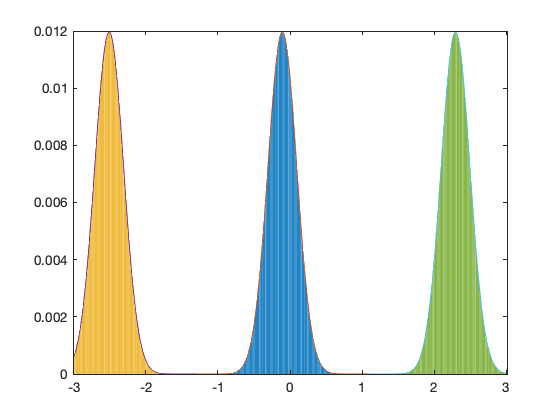

In [3]:
lowX = floor(nSuppX/10);
midX = floor(nSuppX/2); 
highX = floor(9*nSuppX/10);
bar(suppX,capPi(midX,:));
hold on;
plot(suppX,((boundX(2)-boundX(1))/(nSuppX-1))*normpdf((deltaX(midX,:)-mu)/sigma)/sigma);
bar(suppX,capPi(lowX,:));
plot(suppX,((boundX(2)-boundX(1))/(nSuppX-1))*normpdf((deltaX(lowX,:)-mu)/sigma)/sigma);
bar(suppX,capPi(highX,:));
plot(suppX,((boundX(2)-boundX(1))/(nSuppX-1))*normpdf((deltaX(highX,:)-mu)/sigma)/sigma);
hold off;

### Bellman Operator

 

The Bellman operator simply takes $u(X_t)=X_t$. 

In [4]:
rho = 0.9;
bellman=@(v)(max([suppX+rho*(capPi*v)';zeros(1,nSuppX)])');

### Solve by Value Function Iteration

We iterate on the Bellman operator from $v=0$ to find its unique fixed point.

In [5]:
v=0; vOld=1; dist = [];
while max(max(abs(v-vOld)))>1E-9
    vOld = v;
    v = bellman(vOld);
    dist = [dist;max(max(abs(v-vOld)))];
end

The contraction property manifests itself in a plot of the distance between successive approximations.

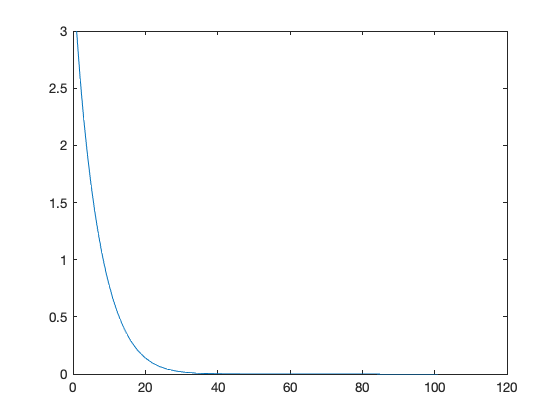

In [7]:
plot(1:size(dist,1),dist);

Because the Bellman operator is a contraction, value function iteration converges monotonically to its unique fixed point.

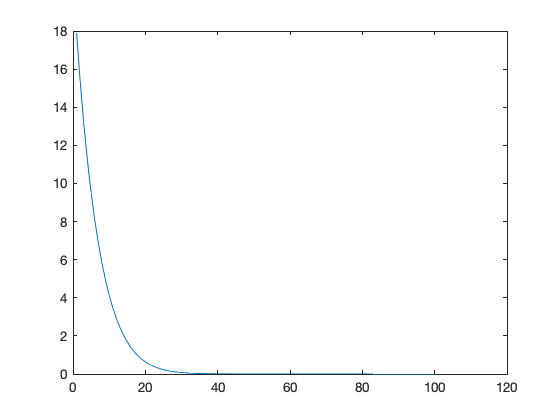

In [8]:
fixedPoint=v;
v=0; vOld=1; dist=[]; 
while max(max(abs(v-vOld)))>1E-9
    vOld = v;
    v = bellman(vOld);
    dist = [dist;max(max(abs(v-fixedPoint)))];
end
plot(1:size(dist,1),dist);


ans =

   -0.0720



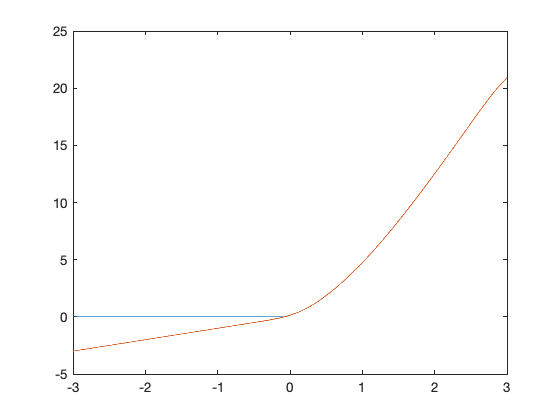

In [9]:
UCont = suppX'+rho*(capPi*v); 
plot(suppX,[v UCont])
min(suppX(find(UCont>0)))